# **Importing the required libraries**

In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading the Arizona Crash Dataset**

In [298]:
file_path = r"C:\Transportation\UKY\Project CE610\Deepak_Raj_Shah_CE610\Arizona_Tempe_Crash_Data.xlsx"
df = pd.read_excel(file_path)

In [299]:
pd.set_option('display.max_columns', None)  #Displays all columns

In [300]:
df

,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude
0,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210
1,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,33.423190,-111.937690
2,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960
3,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Daylight,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.417790,-111.947910
4,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48877,48878,4073065,2023/08/11 23:59:00+00,2023,Baseline Rd,I-10 Exit 155 A1-Ramp,93.000,Intersection T Inter 203,0.0,0.0,No Injury,Sideswipe Same Direction,Daylight,Clear,Unknown,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.378267,-111.968937
48878,48879,4073975,2023/08/16 17:32:00+00,2023,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005
48879,48880,4075579,2023/08/16 23:05:00+00,2023,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763
48880,48881,4077064,2023/08/19 03:21:00+00,2023,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OBJECTID             48882 non-null  int64  
 1   Incidentid           48882 non-null  int64  
 2   DateTime             48882 non-null  object 
 3   Year                 48882 non-null  int64  
 4   StreetName           48863 non-null  object 
 5   CrossStreet          48578 non-null  object 
 6   Distance             48881 non-null  float64
 7   JunctionRelation     48881 non-null  object 
 8   Totalinjuries        48881 non-null  float64
 9   Totalfatalities      48881 non-null  float64
 10  Injuryseverity       48881 non-null  object 
 11  Collisionmanner      48881 non-null  object 
 12  Lightcondition       48881 non-null  object 
 13  Weather              48881 non-null  object 
 14  SurfaceCondition     48881 non-null  object 
 15  Unittype_One         48881 non-null 

# **Data Cleaning and Preprocessing for Exploratory Data Analysis (EDA)**

### *Extract Year, Month, Day and Time from DateTime*

In [302]:
# Convert 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], utc=True)

# Extract Year, Month, Day, and Time into separate columns
df.insert(df.columns.get_loc('DateTime') + 2, 'Month', df['DateTime'].dt.month)
df.insert(df.columns.get_loc('DateTime') + 3, 'Day', df['DateTime'].dt.day)
df.insert(df.columns.get_loc('DateTime') + 4, 'Time', df['DateTime'].dt.time)

### *Extract Hour from the Time*

In [303]:
#Extracting just the hour portion of the Time
# This Extracts the hour from the 'Time' column and create a new column 'Hour'
df.insert(df.columns.get_loc('Time') + 1, 'Hour', df['Time'].apply(lambda x: x.hour))

In [304]:
df

,OBJECTID,Incidentid,DateTime,Year,Month,Day,Time,Hour,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude
0,1,2598369,2012-01-01 07:25:00+00:00,2012,1,1,07:25:00,7,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210
1,2,2593420,2012-01-01 11:45:00+00:00,2012,1,1,11:45:00,11,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,33.423190,-111.937690
2,3,2588493,2012-01-01 18:07:00+00:00,2012,1,1,18:07:00,18,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960
3,4,2584449,2012-01-02 00:03:00+00:00,2012,1,2,00:03:00,0,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Daylight,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.417790,-111.947910
4,5,2592211,2012-01-02 00:12:00+00:00,2012,1,2,00:12:00,0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48877,48878,4073065,2023-08-11 23:59:00+00:00,2023,8,11,23:59:00,23,Baseline Rd,I-10 Exit 155 A1-Ramp,93.000,Intersection T Inter 203,0.0,0.0,No Injury,Sideswipe Same Direction,Daylight,Clear,Unknown,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.378267,-111.968937
48878,48879,4073975,2023-08-16 17:32:00+00:00,2023,8,16,17:32:00,17,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005
48879,48880,4075579,2023-08-16 23:05:00+00:00,2023,8,16,23:05:00,23,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763
48880,48881,4077064,2023-08-19 03:21:00+00:00,2023,8,19,03:21:00,3,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075


In [305]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the number of null values in each column
print(null_counts)

OBJECTID                 0
Incidentid               0
DateTime                 0
Year                     0
Month                    0
Day                      0
Time                     0
Hour                     0
StreetName              19
CrossStreet            304
Distance                 1
JunctionRelation         1
Totalinjuries            1
Totalfatalities          1
Injuryseverity           1
Collisionmanner          1
Lightcondition           1
Weather                  1
SurfaceCondition         1
Unittype_One             1
Age_Drv1                45
Gender_Drv1            885
Traveldirection_One      1
Unitaction_One           1
Violation1_Drv1         45
AlcoholUse_Drv1         45
DrugUse_Drv1            45
Latitude               139
Longitude              139
dtype: int64


In [306]:
columns_with_missing_values = ['Distance', 'JunctionRelation', 'Totalinjuries', 'Totalfatalities', 'Injuryseverity', 'Collisionmanner', 'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One']

# Finds the rows where any of the listed columns has a missing value
rows_with_missing_values = df[df[columns_with_missing_values].isnull().any(axis=1)]

# Displays the rows with missing values in the specified columns
print(rows_with_missing_values)

       OBJECTID  Incidentid                  DateTime  Year  Month  Day  \
40399     40400     3768523 2021-03-22 01:12:00+00:00  2021      3   22   

           Time  Hour StreetName CrossStreet  Distance JunctionRelation  \
40399  01:12:00     1  Priest Dr         NaN       NaN              NaN   

       Totalinjuries  Totalfatalities Injuryseverity Collisionmanner  \
40399            NaN              NaN            NaN             NaN   

      Lightcondition Weather SurfaceCondition Unittype_One  Age_Drv1  \
40399            NaN     NaN              NaN          NaN       NaN   

      Gender_Drv1 Traveldirection_One Unitaction_One Violation1_Drv1  \
40399         NaN                 NaN            NaN             NaN   

      AlcoholUse_Drv1 DrugUse_Drv1  Latitude  Longitude  
40399             NaN          NaN       NaN        NaN  


### *The Row 40399 is deleted from the dataset*

In [307]:
df.loc[40399]

OBJECTID                                   40400
Incidentid                               3768523
DateTime               2021-03-22 01:12:00+00:00
Year                                        2021
Month                                          3
Day                                           22
Time                                    01:12:00
Hour                                           1
StreetName                             Priest Dr
CrossStreet                                  NaN
Distance                                     NaN
JunctionRelation                             NaN
Totalinjuries                                NaN
Totalfatalities                              NaN
Injuryseverity                               NaN
Collisionmanner                              NaN
Lightcondition                               NaN
Weather                                      NaN
SurfaceCondition                             NaN
Unittype_One                                 NaN
Age_Drv1            

In [308]:
# Delete the row with index 40399
df = df.drop(index=40399)

In [309]:
# Reset the index to renumber rows
df.reset_index(drop=True, inplace=True)

In [313]:
df

,OBJECTID,Incidentid,DateTime,Year,Month,Day,Time,Hour,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude
0,1,2598369,2012-01-01 07:25:00+00:00,2012,1,1,07:25:00,7,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210
1,2,2593420,2012-01-01 11:45:00+00:00,2012,1,1,11:45:00,11,7th St,Myrtle Ave,139.920,Not Junction Related,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,255.0,NaN,East,Backing,Unknown,No Apparent Influence,No Apparent Influence,33.423190,-111.937690
2,3,2588493,2012-01-01 18:07:00+00:00,2012,1,1,18:07:00,18,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960
3,4,2584449,2012-01-02 00:03:00+00:00,2012,1,2,00:03:00,0,11th St,Judd St,200.112,Not Junction Related,0.0,0.0,No Injury,Sideswipe Opposite Direction,Daylight,Clear,Dry,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.417790,-111.947910
4,5,2592211,2012-01-02 00:12:00+00:00,2012,1,2,00:12:00,0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48876,48878,4073065,2023-08-11 23:59:00+00:00,2023,8,11,23:59:00,23,Baseline Rd,I-10 Exit 155 A1-Ramp,93.000,Intersection T Inter 203,0.0,0.0,No Injury,Sideswipe Same Direction,Daylight,Clear,Unknown,Driver,255.0,NaN,Unknown,Unknown,Unknown,No Apparent Influence,No Apparent Influence,33.378267,-111.968937
48877,48879,4073975,2023-08-16 17:32:00+00:00,2023,8,16,17:32:00,17,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005
48878,48880,4075579,2023-08-16 23:05:00+00:00,2023,8,16,23:05:00,23,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763
48879,48881,4077064,2023-08-19 03:21:00+00:00,2023,8,19,03:21:00,3,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075


In [314]:
# Find unique values in the 'StreetName' column
unique_street_names = df['StreetName'].unique()

# Display the unique values
print(unique_street_names)

['University Dr' '7th St' 'Price Rd' '11th St' 'Rural Rd'
 'Warner Ranch Dr' 'Jentilly Ln' 'Elliot Rd' 'Carson Rd' 'Baseline Rd'
 'Broadway Rd' 'Priest Dr' 'Mill Ave' 'Warner Rd' 'Mcclintock Dr'
 'Southern Ave' 'Kyrene Rd' 'Scottsdale Rd' 'Terrace Rd' 'Siesta Ln'
 '52nd St' 'Rio Salado Pkwy' 'Grove Pkwy' 'Apache Blvd' 'Center Pkwy'
 'Dorsey Ln' 'Guadalupe Rd' '10th St' 'Manhatton Dr' 'Vineyard Rd'
 '48th St' 'Roosevelt St' 'Orange St' 'Packard Dr' '9th St'
 'Country Club Way' 'Maple Ave' 'Lakeshore Dr' 'Hardy Dr' 'Southshore Dr'
 'Carter Dr' 'Forest Ave' 'Susan Ln' 'Ray Rd' 'Palmcroft Dr' 'College Ave'
 'Harry St' '13th St' '5th St' '2nd St' 'Ash Ave' 'Miller Rd'
 'Price Nb Rd' 'Dennis Dr' 'Concorda Dr' '56th St' '14th St' 'Curry Rd'
 '6th St' 'Carson Dr' 'Lemon St' 'Los Feliz Dr' 'Wendler Dr' 'Tempe Dr'
 'Broadmor Dr' '4th St' 'Arizona Mills Cir' 'Minton Dr' 'Weber Dr'
 'Alameda Dr' 'La Jolla Dr' 'Libra Dr' 'Fair Ln' '1st St' 'Evergreen Rd'
 'Riviera Dr' 'Dateland Dr' 'Playa Del Norte

In [315]:
street_name_counts = df['StreetName'].value_counts()

# Display the unique values and their frequencies
print(street_name_counts)

StreetName
Rural Rd                4962
Baseline Rd             4427
University Dr           3967
Broadway Rd             3904
McClintock Dr           3367
                        ... 
Curry St                   1
Del Sol Dr                 1
Newberry Ln                1
Frontage Rd                1
I-10 Exit 158 A-Ramp       1
Name: count, Length: 501, dtype: int64


In [316]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the number of null values in each column
print(null_counts)

OBJECTID                 0
Incidentid               0
DateTime                 0
Year                     0
Month                    0
Day                      0
Time                     0
Hour                     0
StreetName              19
CrossStreet            303
Distance                 0
JunctionRelation         0
Totalinjuries            0
Totalfatalities          0
Injuryseverity           0
Collisionmanner          0
Lightcondition           0
Weather                  0
SurfaceCondition         0
Unittype_One             0
Age_Drv1                44
Gender_Drv1            884
Traveldirection_One      0
Unitaction_One           0
Violation1_Drv1         44
AlcoholUse_Drv1         44
DrugUse_Drv1            44
Latitude               138
Longitude              138
dtype: int64


### *Some data in the Age_Drv1 column are erroneous and are labeled as 111 or 255. These columns are removed from the dataset*

In [317]:
# Filter rows where 'Age_Drv1' is less than or equal to 100
df = df[df['Age_Drv1'] <= 100]

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)


In [318]:
unittype_counts = df['Unittype_One'].value_counts()

# Display the unique values and their frequencies
print(unittype_counts)

Unittype_One
Driver          41848
Pedalcyclist     1050
Pedestrian        418
Name: count, dtype: int64


### *Only Including Motor Vehicle Driver Crashes in the Dataframe*

In [319]:
# Filter out rows where 'Unittype_One' is not equal to 'Driver'
df = df[df['Unittype_One'] == 'Driver']

# Reset the index if you want to renumber the rows
df.reset_index(drop=True, inplace=True)

In [321]:
unittype_counts = df['Unittype_One'].value_counts()

# Display the unique values and their frequencies
print(unittype_counts)

Unittype_One
Driver    41848
Name: count, dtype: int64


In [322]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the number of null values in each column
print(null_counts)

OBJECTID                 0
Incidentid               0
DateTime                 0
Year                     0
Month                    0
Day                      0
Time                     0
Hour                     0
StreetName              18
CrossStreet            246
Distance                 0
JunctionRelation         0
Totalinjuries            0
Totalfatalities          0
Injuryseverity           0
Collisionmanner          0
Lightcondition           0
Weather                  0
SurfaceCondition         0
Unittype_One             0
Age_Drv1                 0
Gender_Drv1              0
Traveldirection_One      0
Unitaction_One           0
Violation1_Drv1          0
AlcoholUse_Drv1          0
DrugUse_Drv1             0
Latitude               124
Longitude              124
dtype: int64


## **Combining similar categories into one for relevant parameters**

In [326]:
violation_counts = df['Violation1_Drv1'].value_counts()
print(violation_counts)

Violation1_Drv1
Speed To Fast For Conditions                        13106
Failed To Yield Right Of Way                         9107
Unsafe Lane Change                                   3357
Followed Too Closely                                 3114
Disregarded Traffic Signal                           2949
Unknown                                              2078
Other                                                2019
Made Improper Turn                                   1843
Inattention Distraction                              1429
Failed To Keep In Proper Lane                        1088
No Improper Action                                    861
Exceeded Lawful Speed                                 205
Ran Stop Sign                                         174
Drove Rode In Opposing Traffic Lane                   171
Other Unsafe Passing                                  109
Drove Left Of Center Line                              87
Disregarded Pavement Markings                          4

### *It is evident that many categories in the Violation1_Drv1 parameter are similar. Hence there is a need to combine them for EDA and further analysis*

### Speed To Fast For Conditions + Exceeded Lawful Speed = "**Overspeeding**"
### Unsafe Lane Change + Failed To Keep In Proper Lane + Drove Rode In Opposing Traffic Lane + Disregarded Pavement Markings + Drove Left of Center Line = "**Lane Violation**"
### Failed To Yield Right of Way = "**Failed to Yield Right of Way**"
### Followed Too Closely + Other Unsafe Passing + Aggressive Driving + Passed In No Passing Zone = "**Aggressive Driving**" 
### Disregarded Traffic Signal + Ran Stop Sign = "**Signal/Sign Violation**"
### Made Improper Turn = "**Turning Violation**"
### Inattention Distraction = "**Distracted Behavior**"
### Unknown + Other + No Improper Action + Knowingly Operated With Faulty Missing Equipment + Electronic Communications Device + 108 + Wrong Way Driving + 109 +  Required Motorcycle Safety Equipment Not Used = "**Other**"

In [327]:
# Define conditions for each category
conditions = [
    (df['Violation1_Drv1'].isin(['Speed To Fast For Conditions', 'Exceeded Lawful Speed'])),
    (df['Violation1_Drv1'].isin(['Unsafe Lane Change', 'Failed To Keep In Proper Lane', 
                                 'Drove Rode In Opposing Traffic Lane', 'Disregarded Pavement Markings', 
                                 'Drove Left Of Center Line'])),
    (df['Violation1_Drv1'] == 'Failed To Yield Right Of Way'),
    (df['Violation1_Drv1'].isin(['Followed Too Closely', 'Other Unsafe Passing', 
                                 'Aggressive Driving', 'Passed In No Passing Zone'])),
    (df['Violation1_Drv1'].isin(['Disregarded Traffic Signal', 'Ran Stop Sign'])),
    (df['Violation1_Drv1'] == 'Made Improper Turn'),
    (df['Violation1_Drv1'] == 'Inattention Distraction'),
    (df['Violation1_Drv1'].isin(['Unknown', 'Other', 'No Improper Action', 
                                 'Knowingly Operated With Faulty Missing Equipment', 
                                 'Electronic Communications Device', '108', 'Wrong Way Driving', 
                                 '109', 'Required Motorcycle Safety Equipment Not Used']))
]

# Define corresponding categories
categories = ['Overspeeding', 'Lane Violation', 'Failed to Yield Right of Way', 
              'Aggressive Driving', 'Signal/Sign Violation', 'Turning Violation', 
              'Distracted Behavior', 'Other']

# Create the new 'Violation_Type' column based on the conditions
df['Violation_Type'] = np.select(conditions, categories, default='Other')


In [328]:
# Display the updated DataFrame
print(df[['Violation1_Drv1', 'Violation_Type']])

                    Violation1_Drv1         Violation_Type
0           Inattention Distraction    Distracted Behavior
1                Made Improper Turn      Turning Violation
2                Unsafe Lane Change         Lane Violation
3                           Unknown                  Other
4      Speed To Fast For Conditions           Overspeeding
...                             ...                    ...
41843    Disregarded Traffic Signal  Signal/Sign Violation
41844    Disregarded Traffic Signal  Signal/Sign Violation
41845  Speed To Fast For Conditions           Overspeeding
41846  Speed To Fast For Conditions           Overspeeding
41847  Speed To Fast For Conditions           Overspeeding

[41848 rows x 2 columns]


In [329]:
df

,OBJECTID,Incidentid,DateTime,Year,Month,Day,Time,Hour,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude,Violation_Type
0,1,2598369,2012-01-01 07:25:00+00:00,2012,1,1,07:25:00,7,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210,Distracted Behavior
1,3,2588493,2012-01-01 18:07:00+00:00,2012,1,1,18:07:00,18,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960,Turning Violation
2,5,2592211,2012-01-02 00:12:00+00:00,2012,1,2,00:12:00,0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470,Lane Violation
3,6,2595894,2012-01-02 00:17:00+00:00,2012,1,2,00:17:00,0,Warner Ranch Dr,Dateland Dr,86.064,Not Junction Related,1.0,0.0,Incapacitating Injury,Single Vehicle,Daylight,Clear,Dry,Driver,25.0,Male,West,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,33.324710,-111.940370,Other
4,8,2599105,2012-01-02 02:56:00+00:00,2012,1,2,02:56:00,2,Jentilly Ln,Broadway Rd,104.016,Intersection Related Non Interchange,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,53.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,Alcohol,No Apparent Influence,33.407790,-111.923710,Overspeeding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41843,48877,4074414,2023-08-11 07:31:00+00:00,2023,8,11,07:31:00,7,Price Rd,Baseline Rd,0.000,Intersection 4 Way 202,2.0,0.0,Suspected Minor Injury,Head On,Dark Lighted,Clear,Dry,Driver,20.0,Male,East,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.378455,-111.893616,Signal/Sign Violation
41844,48879,4073975,2023-08-16 17:32:00+00:00,2023,8,16,17:32:00,17,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005,Signal/Sign Violation
41845,48880,4075579,2023-08-16 23:05:00+00:00,2023,8,16,23:05:00,23,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763,Overspeeding
41846,48881,4077064,2023-08-19 03:21:00+00:00,2023,8,19,03:21:00,3,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075,Overspeeding


### *Combining the given Injuryseverity categories to new groups*
### "Fatal" = **K or Killed**
### "Incapacitating Injury" + "Suspected Serious Injury" = **A**
### "Non Incapacitating Injury" = **B**
### "Possible Injury" + "Suspected Minor Injury" = **C**
### "No Injury" = **O** or **PDO (Property Damage only)**

In [330]:
# Define conditions for each category
injury_conditions = [
    (df['Injuryseverity'] == 'Fatal'),
    (df['Injuryseverity'].isin(['Incapacitating Injury', 'Suspected Serious Injury'])),
    (df['Injuryseverity'] == 'Non Incapacitating Injury'),
    (df['Injuryseverity'].isin(['Possible Injury', 'Suspected Minor Injury'])),
    (df['Injuryseverity'] == 'No Injury')
]

# Define corresponding categories for Injury_Category
injury_categories = ['K', 'A', 'B', 'C', 'O']

# Create the new 'Injury_Category' column based on the conditions
df['Severity_Type'] = np.select(injury_conditions, injury_categories, default='Other')

In [331]:
df

,OBJECTID,Incidentid,DateTime,Year,Month,Day,Time,Hour,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude,Violation_Type,Severity_Type
0,1,2598369,2012-01-01 07:25:00+00:00,2012,1,1,07:25:00,7,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210,Distracted Behavior,B
1,3,2588493,2012-01-01 18:07:00+00:00,2012,1,1,18:07:00,18,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960,Turning Violation,O
2,5,2592211,2012-01-02 00:12:00+00:00,2012,1,2,00:12:00,0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470,Lane Violation,C
3,6,2595894,2012-01-02 00:17:00+00:00,2012,1,2,00:17:00,0,Warner Ranch Dr,Dateland Dr,86.064,Not Junction Related,1.0,0.0,Incapacitating Injury,Single Vehicle,Daylight,Clear,Dry,Driver,25.0,Male,West,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,33.324710,-111.940370,Other,A
4,8,2599105,2012-01-02 02:56:00+00:00,2012,1,2,02:56:00,2,Jentilly Ln,Broadway Rd,104.016,Intersection Related Non Interchange,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,53.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,Alcohol,No Apparent Influence,33.407790,-111.923710,Overspeeding,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41843,48877,4074414,2023-08-11 07:31:00+00:00,2023,8,11,07:31:00,7,Price Rd,Baseline Rd,0.000,Intersection 4 Way 202,2.0,0.0,Suspected Minor Injury,Head On,Dark Lighted,Clear,Dry,Driver,20.0,Male,East,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.378455,-111.893616,Signal/Sign Violation,C
41844,48879,4073975,2023-08-16 17:32:00+00:00,2023,8,16,17:32:00,17,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005,Signal/Sign Violation,O
41845,48880,4075579,2023-08-16 23:05:00+00:00,2023,8,16,23:05:00,23,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763,Overspeeding,C
41846,48881,4077064,2023-08-19 03:21:00+00:00,2023,8,19,03:21:00,3,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075,Overspeeding,O


### *Combining Collisionmanner into distinct categories new variable Collision_Type*
### "Rear End" + "Rear To Side" + "Rear To Rear" = **Rear End**
### "Left Turn" + "U Turn" = **Turning**
### "Sideswipe Same Direction" + "Sideswipe Opposite Direction" = **Sideswipe**
### "Head On" = **Head On**
### "ANGLE (Front To Side)(Other Than Left Turn)" + "Angle - Other Than Left Turn 2" = **Angle**
### "Single Vehicle" = **Stationary Object**
### "Other" + "Unknown" + "10" = **Other**

In [332]:
# Define the conditions for each category
conditions = [
    (df['Collisionmanner'].isin(['Rear End', 'Rear To Side', 'Rear To Rear'])),
    (df['Collisionmanner'].isin(['Left Turn', 'U Turn'])),
    (df['Collisionmanner'].isin(['Sideswipe Same Direction', 'Sideswipe Opposite Direction'])),
    (df['Collisionmanner'] == 'Head On'),
    (df['Collisionmanner'].isin(['ANGLE (Front To Side)(Other Than Left Turn)', 'Angle - Other Than Left Turn 2'])),
    (df['Collisionmanner'] == 'Single Vehicle'),
    (df['Collisionmanner'].isin(['Other', 'Unknown', '10']))
]

# Define the corresponding values for each category
values = ['Rear End', 'Turning', 'Sideswipe', 'Head On', 'Angle', 'Stationary Object', 'Other']

# Create the new 'Collision_Type' column using np.select
df['Collision_Type'] = np.select(conditions, values, default='Other')

# Print the first few rows to check the result
print(df[['Collisionmanner', 'Collision_Type']].head())

                               Collisionmanner     Collision_Type
0  ANGLE (Front To Side)(Other Than Left Turn)              Angle
1                                    Left Turn            Turning
2                     Sideswipe Same Direction          Sideswipe
3                               Single Vehicle  Stationary Object
4                               Single Vehicle  Stationary Object


In [334]:
collisiontype_counts = df['Collision_Type'].value_counts()
print(collisiontype_counts)

Collision_Type
Rear End             15968
Turning               8732
Angle                 7005
Sideswipe             5626
Stationary Object     2850
Other                 1159
Head On                508
Name: count, dtype: int64


In [335]:
df

,OBJECTID,Incidentid,DateTime,Year,Month,Day,Time,Hour,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude,Violation_Type,Severity_Type,Collision_Type
0,1,2598369,2012-01-01 07:25:00+00:00,2012,1,1,07:25:00,7,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210,Distracted Behavior,B,Angle
1,3,2588493,2012-01-01 18:07:00+00:00,2012,1,1,18:07:00,18,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960,Turning Violation,O,Turning
2,5,2592211,2012-01-02 00:12:00+00:00,2012,1,2,00:12:00,0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470,Lane Violation,C,Sideswipe
3,6,2595894,2012-01-02 00:17:00+00:00,2012,1,2,00:17:00,0,Warner Ranch Dr,Dateland Dr,86.064,Not Junction Related,1.0,0.0,Incapacitating Injury,Single Vehicle,Daylight,Clear,Dry,Driver,25.0,Male,West,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,33.324710,-111.940370,Other,A,Stationary Object
4,8,2599105,2012-01-02 02:56:00+00:00,2012,1,2,02:56:00,2,Jentilly Ln,Broadway Rd,104.016,Intersection Related Non Interchange,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,53.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,Alcohol,No Apparent Influence,33.407790,-111.923710,Overspeeding,O,Stationary Object
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41843,48877,4074414,2023-08-11 07:31:00+00:00,2023,8,11,07:31:00,7,Price Rd,Baseline Rd,0.000,Intersection 4 Way 202,2.0,0.0,Suspected Minor Injury,Head On,Dark Lighted,Clear,Dry,Driver,20.0,Male,East,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.378455,-111.893616,Signal/Sign Violation,C,Head On
41844,48879,4073975,2023-08-16 17:32:00+00:00,2023,8,16,17:32:00,17,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005,Signal/Sign Violation,O,Turning
41845,48880,4075579,2023-08-16 23:05:00+00:00,2023,8,16,23:05:00,23,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763,Overspeeding,C,Rear End
41846,48881,4077064,2023-08-19 03:21:00+00:00,2023,8,19,03:21:00,3,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075,Overspeeding,O,Angle


### *Combining The Alcohol or Drug Usage into a single variable*

In [336]:
# Create a new column "Alcohol/Drug Use" based on the specified conditions
df['Alcohol/Drug Use'] = 'No'
df.loc[((df['AlcoholUse_Drv1'] == 'Alcohol') | (df['DrugUse_Drv1'] == 'Drugs')) & 
       ~((df['AlcoholUse_Drv1'] == 'No Apparent Influence') & (df['DrugUse_Drv1'] == 'No Apparent Influence')), 
       'Alcohol/Drug Use'] = 'Yes'


In [337]:
Alcohol_Drug_counts = df['Alcohol/Drug Use'].value_counts()

# Display the unique values and their frequencies
print(Alcohol_Drug_counts)

Alcohol/Drug Use
No     39308
Yes     2540
Name: count, dtype: int64


In [338]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['AlcoholUse_Drv1'] != 'No Apparent Influence') & (df['DrugUse_Drv1'] != 'No Apparent Influence')]

# Get the number of rows in the filtered DataFrame
num_rows = len(filtered_df)

# Print the result
print(f'The number of rows with values other than "No Apparent Influence" in both columns is: {num_rows}')


The number of rows with values other than "No Apparent Influence" in both columns is: 96


In [134]:
df

,OBJECTID,Incidentid,DateTime,Year,Month,Day,Time,Hour,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude,Violation_Type,Severity_Type,TimeRange,Collision_Type
0,1,2598369,2012-01-01 07:25:00+00:00,2012,1,1,07:25:00,7,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210,Distracted Behavior,B,Morning (6-12),Angle
1,3,2588493,2012-01-01 18:07:00+00:00,2012,1,1,18:07:00,18,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960,Turning Violation,O,Afternoon (12-18),Turning
2,5,2592211,2012-01-02 00:12:00+00:00,2012,1,2,00:12:00,0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470,Lane Violation,C,Night (0-6),Sideswipe
3,6,2595894,2012-01-02 00:17:00+00:00,2012,1,2,00:17:00,0,Warner Ranch Dr,Dateland Dr,86.064,Not Junction Related,1.0,0.0,Incapacitating Injury,Single Vehicle,Daylight,Clear,Dry,Driver,25.0,Male,West,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,33.324710,-111.940370,Other,A,Night (0-6),Stationary Object
4,8,2599105,2012-01-02 02:56:00+00:00,2012,1,2,02:56:00,2,Jentilly Ln,Broadway Rd,104.016,Intersection Related Non Interchange,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,53.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,Alcohol,No Apparent Influence,33.407790,-111.923710,Overspeeding,O,Night (0-6),Stationary Object
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41843,48877,4074414,2023-08-11 07:31:00+00:00,2023,8,11,07:31:00,7,Price Rd,Baseline Rd,0.000,Intersection 4 Way 202,2.0,0.0,Suspected Minor Injury,Head On,Dark Lighted,Clear,Dry,Driver,20.0,Male,East,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.378455,-111.893616,Signal/Sign Violation,C,Morning (6-12),Head On
41844,48879,4073975,2023-08-16 17:32:00+00:00,2023,8,16,17:32:00,17,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005,Signal/Sign Violation,O,Afternoon (12-18),Turning
41845,48880,4075579,2023-08-16 23:05:00+00:00,2023,8,16,23:05:00,23,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763,Overspeeding,C,Evening (18-24),Rear End
41846,48881,4077064,2023-08-19 03:21:00+00:00,2023,8,19,03:21:00,3,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075,Overspeeding,O,Night (0-6),Angle


# **Exploratory Data Analysis (EDA)**

C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


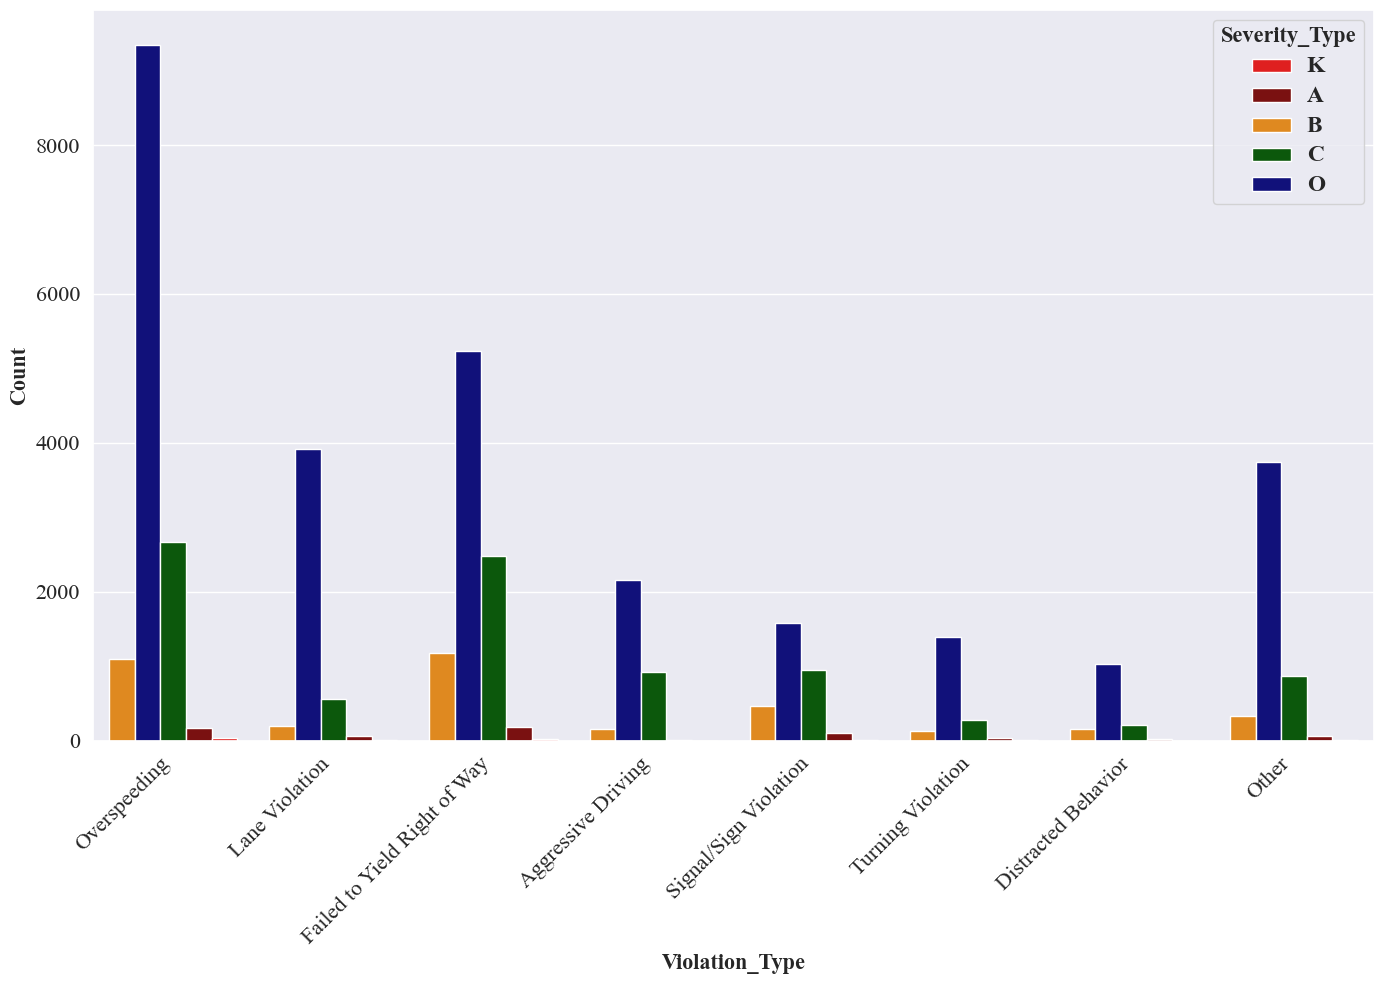

In [339]:
severity_order = ['K', 'A', 'B', 'C', 'O']
dangerous_palette = {'K': 'red', 'A': 'darkred', 'B': 'darkorange', 'C': 'darkgreen', 'O': 'darkblue'}

plt.figure(figsize=(14, 10))
ax = sns.countplot(x='Violation_Type', hue='Severity_Type', data=df, palette=dangerous_palette, order=violation_order)

plt.xlabel('Violation_Type', fontsize=16, fontweight='bold', fontname='Times New Roman')
plt.ylabel('Count', fontsize=16, fontweight='bold', fontname='Times New Roman')

plt.xticks(rotation=45, ha='right', fontsize=16, fontname='Times New Roman')
plt.yticks(rotation=0, ha='right', fontsize=16, fontname='Times New Roman')

legend_order = ['K', 'A', 'B', 'C', 'O']
handles, labels = ax.get_legend_handles_labels()
order = [labels.index(str(x)) for x in legend_order]
legend = ax.legend(handles=[handles[i] for i in order], labels=legend_order, title='Severity_Type', 
                   fontsize=14, title_fontsize=14, loc='upper right')

legend.get_title().set_fontname('Times New Roman')
legend.get_title().set_fontweight('bold')
legend.get_title().set_fontsize(16)  
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontweight('bold')
    text.set_fontsize(14 * 1.2) 

plt.tight_layout()

plt.savefig('relationship_plot_hd.png', dpi=600)

plt.show()

In [340]:
killed_df = df[df['Severity_Type'] == 'K']

total_killed_crashes = len(killed_df)

overspeeding_killed_crashes = len(killed_df[killed_df['Violation_Type'] == 'Overspeeding'])

percentage_overspeeding_killed = (overspeeding_killed_crashes / total_killed_crashes) * 100

print(f"The percentage of crashes with 'Killed' due to 'Overspeeding' is: {percentage_overspeeding_killed:.2f}%")
print (overspeeding_killed_crashes,total_killed_crashes)

The percentage of crashes with 'Killed' due to 'Overspeeding' is: 37.08%
33 89


In [341]:
incapacitating_df = df[df['Severity_Type'] == 'A']

total_incapacitating_crashes = len(incapacitating_df)

overspeeding_incapacitating_crashes = len(incapacitating_df[incapacitating_df['Violation_Type'] == 'Overspeeding'])

percentage_overspeeding_incapacitating = (overspeeding_incapacitating_crashes / total_incapacitating_crashes) * 100

print(f"The percentage of crashes with 'Incapacitating Injury' (Severity_Type A) due to 'Overspeeding' is: {percentage_overspeeding_incapacitating:.2f}%")
print(overspeeding_incapacitating_crashes, total_incapacitating_crashes)

The percentage of crashes with 'Incapacitating Injury' (Severity_Type A) due to 'Overspeeding' is: 25.49%
169 663


In [342]:
violationtype_counts = df['Violation_Type'].value_counts()
print(violationtype_counts)

Violation_Type
Overspeeding                    13311
Failed to Yield Right of Way     9107
Other                            5029
Lane Violation                   4745
Aggressive Driving               3261
Signal/Sign Violation            3123
Turning Violation                1843
Distracted Behavior              1429
Name: count, dtype: int64


### *Percentage of Severity_Type due to Correponding Violation_Type Chart*

In [345]:
cross_table = pd.crosstab(df['Violation_Type'], df['Severity_Type'], margins=True, margins_name='Total')

# Calculate percentages
percentage_table = (cross_table / cross_table.loc['Total']) * 100

# Display the table with styling
styled_table = percentage_table.style.format("{:.2f}%").background_gradient(cmap='viridis', axis=1)

# Show the styled table
styled_table

#The total column is the percentange of corresponding violation type with respect to total number of crashes. 
#The Total row is just the addition of respective cells in the Severity_Type

Severity_Type,A,B,C,K,O,Total
Violation_Type,,,,,,
Aggressive Driving,2.41%,4.38%,10.29%,0.00%,7.60%,7.79%
Distracted Behavior,3.32%,4.38%,2.41%,1.12%,3.61%,3.41%
Failed to Yield Right of Way,28.81%,31.57%,27.72%,25.84%,18.42%,21.76%
Lane Violation,9.65%,5.18%,6.20%,8.99%,13.81%,11.34%
Other,9.65%,8.97%,9.73%,12.36%,13.19%,12.02%
Overspeeding,25.49%,29.32%,29.83%,37.08%,32.89%,31.81%
Signal/Sign Violation,15.08%,12.70%,10.68%,10.11%,5.58%,7.46%
Turning Violation,5.58%,3.52%,3.14%,4.49%,4.89%,4.40%
Total,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%


### *Time of Crash*

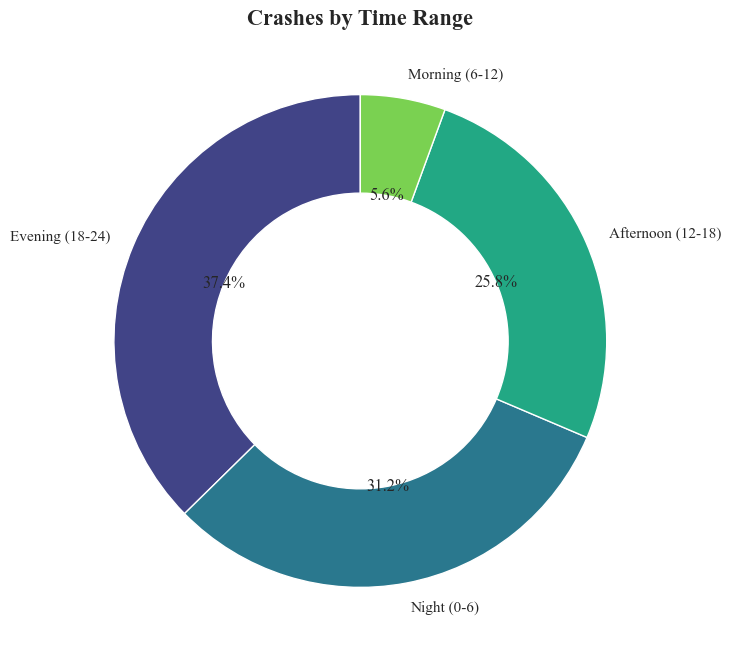

In [346]:
bins = [0, 6, 12, 18, 24]
time_labels = ['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)']

df['TimeRange'] = pd.cut(df['Hour'], bins=bins, labels=time_labels, include_lowest=True)

time_range_counts = df['TimeRange'].value_counts()

colors = sns.color_palette('viridis', n_colors=len(time_range_counts))

plt.figure(figsize=(8, 8))
plt.pie(time_range_counts, labels=time_range_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title('Crashes by Time Range', fontsize=16, fontweight='bold', fontname='Times New Roman')
plt.show()

### *Weather*

In [347]:
fatal_df = df[df['Severity_Type'] == 'K']

cloudy_rainy_fatal_df = fatal_df[fatal_df['Weather'].isin(['Cloudy', 'Rain'])]

total_fatal_crashes = len(fatal_df)

fatal_in_cloudy_rainy = len(cloudy_rainy_fatal_df)

percentage_fatal_in_cloudy_rainy = (fatal_in_cloudy_rainy / total_fatal_crashes) * 100

print(f"Total fatal crashes: {total_fatal_crashes}")
print(f"Number of fatal crashes in cloudy and rainy conditions: {fatal_in_cloudy_rainy} ({percentage_fatal_in_cloudy_rainy:.2f}%)")


Total fatal crashes: 89
Number of fatal crashes in cloudy and rainy conditions: 13 (14.61%)


### *Collision_Type EDA*

C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


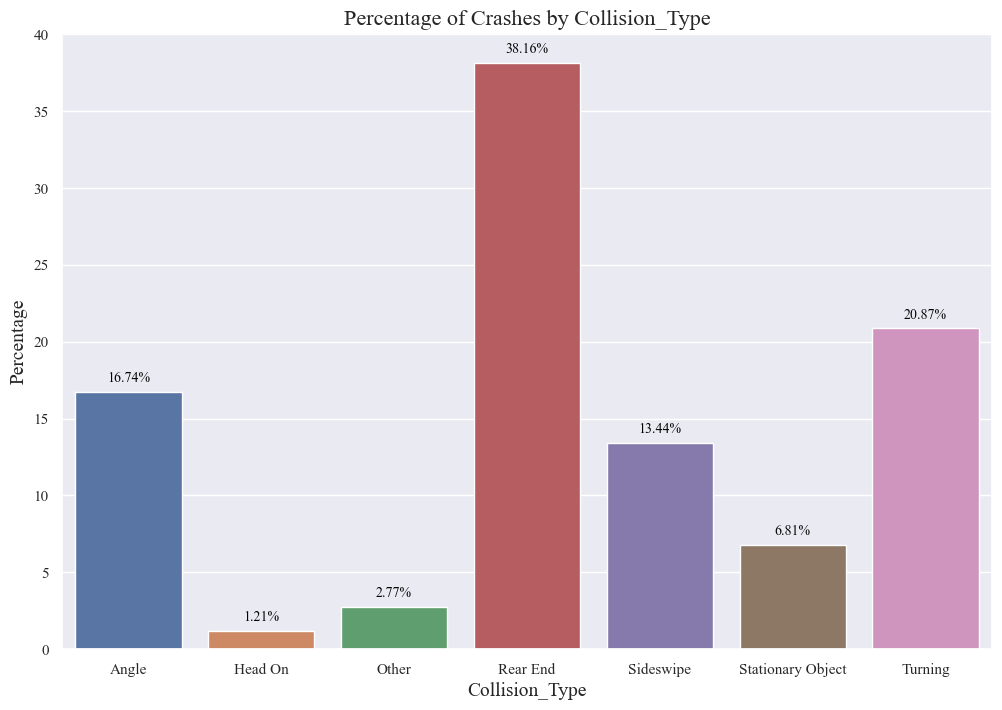

In [348]:
cross_table_collision = pd.crosstab(df['Collision_Type'], columns='Count', margins=True, margins_name='Total')

percentage_table_collision = (cross_table_collision / cross_table_collision.loc['Total']) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=percentage_table_collision.drop('Total'), x=percentage_table_collision.drop('Total').index, y='Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xlabel('Collision_Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of Crashes by Collision_Type', fontsize=16)

plt.show()

In [349]:
fatal_df = df[df['Severity_Type'] == 'K']

# Create a DataFrame for A type crashes
a_type_df = df[df['Severity_Type'] == 'A']

# Group by 'Collision_Type' and calculate the percentage for each group
collision_type_fatal_percentage = (fatal_df.groupby('Collision_Type').size() / fatal_df.shape[0]) * 100
collision_type_a_type_percentage = (a_type_df.groupby('Collision_Type').size() / a_type_df.shape[0]) * 100

# Combine the results into a single DataFrame
result_df = pd.DataFrame({
    'Fatal_Percentage': collision_type_fatal_percentage,
    'A_Type_Percentage': collision_type_a_type_percentage
}).fillna(0)

# Print the result
print(result_df)

                   Fatal_Percentage  A_Type_Percentage
Collision_Type                                        
Angle                     16.853933          21.266968
Head On                    2.247191           4.675716
Other                     21.348315           7.088989
Rear End                   5.617978          16.289593
Sideswipe                  1.123596           3.770739
Stationary Object         29.213483          15.837104
Turning                   23.595506          31.070890


In [350]:
# Filter the DataFrame for fatal crashes
fatal_df = df[df['Severity_Type'] == 'K']

total_fatal_crashes = len(fatal_df)

rear_end_fatal_crashes = len(fatal_df[fatal_df['Collision_Type'] == 'Rear End'])

percentage_rear_end_fatal = (rear_end_fatal_crashes / total_fatal_crashes) * 100

print(f"The percentage of fatal crashes with 'Rear End' Collision_Type is: {percentage_rear_end_fatal:.2f}%")
print(rear_end_fatal_crashes, total_fatal_crashes)

The percentage of fatal crashes with 'Rear End' Collision_Type is: 5.62%
5 89


In [352]:
cross_table_collision = pd.crosstab(df['Collision_Type'], df['Severity_Type'], margins=True, margins_name='Total')

percentage_table_collision = (cross_table_collision / cross_table_collision.loc['Total']) * 100

styled_table_collision = percentage_table_collision.style.format("{:.2f}%").background_gradient(cmap='viridis', axis=1)

styled_table_collision

#The total column is the percentange of corresponding Collision type with respect to total number of crashes. 
#The Total row is just the addition of respective cells in the Severity_Type

Severity_Type,A,B,C,K,O,Total
Collision_Type,,,,,,
Angle,21.27%,19.33%,19.92%,16.85%,15.29%,16.74%
Head On,4.68%,1.69%,1.43%,2.25%,1.00%,1.21%
Other,7.09%,4.03%,3.45%,21.35%,2.23%,2.77%
Rear End,16.29%,29.64%,38.12%,5.62%,39.90%,38.16%
Sideswipe,3.77%,3.84%,5.48%,1.12%,17.47%,13.44%
Stationary Object,15.84%,8.83%,5.76%,29.21%,6.59%,6.81%
Turning,31.07%,32.64%,25.83%,23.60%,17.51%,20.87%
Total,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%


### *Age Analysis*

In [353]:
# Basic statistics
mean_age = df['Age_Drv1'].mean()
median_age = df['Age_Drv1'].median()
std_dev_age = df['Age_Drv1'].std()

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Standard Deviation: {std_dev_age:.2f}")


Mean Age: 35.00
Median Age: 29.00
Standard Deviation: 16.40


C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\CE610\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


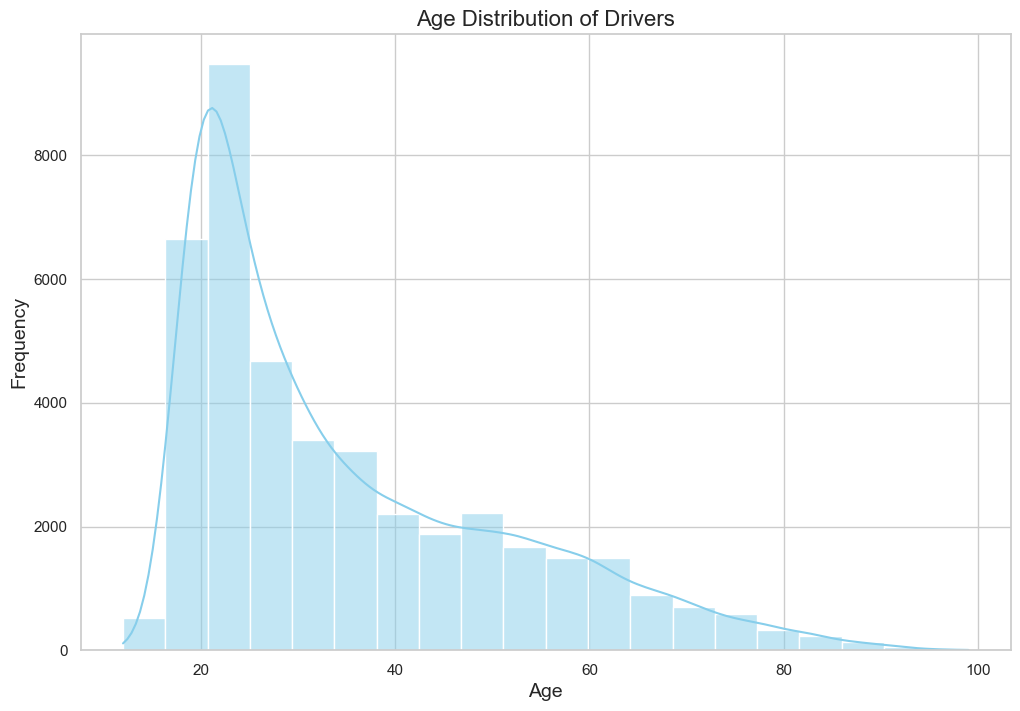

In [354]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.histplot(df['Age_Drv1'], bins=20, kde=True, color='skyblue')

plt.title('Age Distribution of Drivers', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

In [355]:
age_range_df = df[(df['Age_Drv1'] >= 20) & (df['Age_Drv1'] <= 40)]

crashes_between_20_and_40 = len(age_range_df)

print(f"The number of crashes between the ages of 20 to 40 is: {crashes_between_20_and_40}")

total_crashes = len(df)

percentage_crashes_between_20_and_40 = (crashes_between_20_and_40 / total_crashes) * 100

print(f"The percentage of crashes between the ages of 20 to 40 is: {percentage_crashes_between_20_and_40:.2f}%")

The number of crashes between the ages of 20 to 40 is: 24146
The percentage of crashes between the ages of 20 to 40 is: 57.70%


### *Gender Analysis*

In [358]:
gender_counts = df['Gender_Drv1'].value_counts()

total_crashes = len(df)

percentage_crashes_by_gender = (gender_counts / total_crashes) * 100

print("Percentage of crashes by gender:")
print(percentage_crashes_by_gender)

Percentage of crashes by gender:
Gender_Drv1
Male      58.504588
Female    41.495412
Name: count, dtype: float64


In [359]:
gender_counts

Gender_Drv1
Male      24483
Female    17365
Name: count, dtype: int64

### *Alcohol/Drug Usage Analysis*

In [360]:
killed_df = df[df['Severity_Type'] == 'K']

total_killed_crashes = len(killed_df)

alcohol_drug_killed_crashes = len(killed_df[killed_df['Alcohol/Drug Use'] == 'Yes'])

percentage_alcohol_drug_killed = (alcohol_drug_killed_crashes / total_killed_crashes) * 100

print(f"The percentage of crashes with 'Killed' involving Alcohol/Drug Use is: {percentage_alcohol_drug_killed:.2f}%")
print(alcohol_drug_killed_crashes, total_killed_crashes)


The percentage of crashes with 'Killed' involving Alcohol/Drug Use is: 34.83%
31 89


In [361]:
severity_order = ['K', 'A', 'B', 'C', 'O']

cross_table_severity = pd.crosstab(df['Severity_Type'], df['Alcohol/Drug Use'], margins=True, margins_name='Total')

styled_table_severity = cross_table_severity.style.background_gradient(cmap='viridis', axis=1)

styled_table_severity

Alcohol/Drug Use,No,Yes,Total
Severity_Type,,,
A,546,117,663
B,3447,278,3725
C,8379,574,8953
K,58,31,89
O,26878,1540,28418
Total,39308,2540,41848


In [362]:
# Define the order and colors for Severity_Type categories
severity_order = ['K', 'A', 'B', 'C', 'O']

# Create a cross-tabulation table with specified order
cross_table_severity = pd.crosstab(df['Severity_Type'], df['Alcohol/Drug Use'], margins=True, margins_name='Total')

# Calculate percentages out of the row total
percentage_table_severity = (cross_table_severity.div(cross_table_severity['Total'], axis=0) * 100).round(2)

# Display the table with styling
styled_table_severity = percentage_table_severity.style.background_gradient(cmap='viridis', axis=1)

# Show the styled table
styled_table_severity


Alcohol/Drug Use,No,Yes,Total
Severity_Type,,,
A,82.350000,17.650000,100.000000
B,92.540000,7.460000,100.000000
C,93.590000,6.410000,100.000000
K,65.170000,34.830000,100.000000
O,94.580000,5.420000,100.000000
Total,93.930000,6.070000,100.000000


### *Manuever Action (Unitaction_One)*

In [363]:
changing_lanes_k_crashes = df[(df['Severity_Type'] == 'K') & (df['Unitaction_One'] == 'Changing Lanes')]

count_changing_lanes_k_crashes = len(changing_lanes_k_crashes)

print(f"The number of K-type crashes due to 'Changing Lanes' is: {count_changing_lanes_k_crashes}")

The number of K-type crashes due to 'Changing Lanes' is: 2


In [364]:
action_severity_counts = df.groupby(['Unitaction_One', 'Severity_Type']).size().unstack(fill_value=0)

k_a_counts = action_severity_counts[['K', 'A']]

print(k_a_counts)

Severity_Type                        K    A
Unitaction_One                             
Avoiding Vehicle Object Pedestrian   0   10
Backing                              1    0
Changing Lanes                       2   22
Crossing Road                        0    1
Driverless Moving Vehicle            0    0
Entering Parking Position            0    0
Going Straight Ahead                38  306
Improperly Parked                    0    0
Leaving Parking Position             0    0
Making Left Turn                    32  220
Making Right Turn                    0   32
Making U Turn                        1   20
Negotiating A Curve                  9   11
Other                                0    8
Overtaking Passing                   1    6
Properly Parked                      0    0
Slowing In Trafficway                1   11
Stopped In Trafficway                0    2
Unknown                              4   14


In [365]:
df

,OBJECTID,Incidentid,DateTime,Year,Month,Day,Time,Hour,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude,Violation_Type,Severity_Type,Collision_Type,Alcohol/Drug Use,TimeRange
0,1,2598369,2012-01-01 07:25:00+00:00,2012,1,1,07:25:00,7,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210,Distracted Behavior,B,Angle,Yes,Morning (6-12)
1,3,2588493,2012-01-01 18:07:00+00:00,2012,1,1,18:07:00,18,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960,Turning Violation,O,Turning,No,Afternoon (12-18)
2,5,2592211,2012-01-02 00:12:00+00:00,2012,1,2,00:12:00,0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470,Lane Violation,C,Sideswipe,No,Night (0-6)
3,6,2595894,2012-01-02 00:17:00+00:00,2012,1,2,00:17:00,0,Warner Ranch Dr,Dateland Dr,86.064,Not Junction Related,1.0,0.0,Incapacitating Injury,Single Vehicle,Daylight,Clear,Dry,Driver,25.0,Male,West,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,33.324710,-111.940370,Other,A,Stationary Object,No,Night (0-6)
4,8,2599105,2012-01-02 02:56:00+00:00,2012,1,2,02:56:00,2,Jentilly Ln,Broadway Rd,104.016,Intersection Related Non Interchange,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,53.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,Alcohol,No Apparent Influence,33.407790,-111.923710,Overspeeding,O,Stationary Object,Yes,Night (0-6)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41843,48877,4074414,2023-08-11 07:31:00+00:00,2023,8,11,07:31:00,7,Price Rd,Baseline Rd,0.000,Intersection 4 Way 202,2.0,0.0,Suspected Minor Injury,Head On,Dark Lighted,Clear,Dry,Driver,20.0,Male,East,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.378455,-111.893616,Signal/Sign Violation,C,Head On,No,Morning (6-12)
41844,48879,4073975,2023-08-16 17:32:00+00:00,2023,8,16,17:32:00,17,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005,Signal/Sign Violation,O,Turning,No,Afternoon (12-18)
41845,48880,4075579,2023-08-16 23:05:00+00:00,2023,8,16,23:05:00,23,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763,Overspeeding,C,Rear End,No,Evening (18-24)
41846,48881,4077064,2023-08-19 03:21:00+00:00,2023,8,19,03:21:00,3,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075,Overspeeding,O,Angle,No,Night (0-6)


# **LOGISTIC REGRESSION**

### *Now the Relevant parameters are selected for Logistic Regression*

In [367]:
# Select specific columns
selected_columns = ['Age_Drv1', 'Gender_Drv1', 'Violation_Type', 'Severity_Type', 'TimeRange', 'Collision_Type', 'Alcohol/Drug Use']

# Create the new DataFrame by copying such that it will not change the original df
df_new = df[selected_columns].copy()

In [368]:
df_new

,Age_Drv1,Gender_Drv1,Violation_Type,Severity_Type,TimeRange,Collision_Type,Alcohol/Drug Use
0,23.0,Female,Distracted Behavior,B,Morning (6-12),Angle,Yes
1,26.0,Male,Turning Violation,O,Afternoon (12-18),Turning,No
2,59.0,Male,Lane Violation,C,Night (0-6),Sideswipe,No
3,25.0,Male,Other,A,Night (0-6),Stationary Object,No
4,53.0,Male,Overspeeding,O,Night (0-6),Stationary Object,Yes
...,...,...,...,...,...,...,...
41843,20.0,Male,Signal/Sign Violation,C,Morning (6-12),Head On,No
41844,33.0,Male,Signal/Sign Violation,O,Afternoon (12-18),Turning,No
41845,16.0,Male,Overspeeding,C,Evening (18-24),Rear End,No
41846,20.0,Female,Overspeeding,O,Night (0-6),Angle,No


In [369]:
# Rename columns in df_new
df_new = df_new.rename(columns={'Age_Drv1': 'Age', 'Gender_Drv1': 'Gender', 'TimeRange': 'Time_of_Crash'})

In [370]:
# Reorder columns in df_new
column_order = ['Severity_Type', 'Gender', 'Age', 'Time_of_Crash', 'Violation_Type', 'Collision_Type', 'Alcohol/Drug Use']
df_new = df_new[column_order]

In [371]:
df_new

,Severity_Type,Gender,Age,Time_of_Crash,Violation_Type,Collision_Type,Alcohol/Drug Use
0,B,Female,23.0,Morning (6-12),Distracted Behavior,Angle,Yes
1,O,Male,26.0,Afternoon (12-18),Turning Violation,Turning,No
2,C,Male,59.0,Night (0-6),Lane Violation,Sideswipe,No
3,A,Male,25.0,Night (0-6),Other,Stationary Object,No
4,O,Male,53.0,Night (0-6),Overspeeding,Stationary Object,Yes
...,...,...,...,...,...,...,...
41843,C,Male,20.0,Morning (6-12),Signal/Sign Violation,Head On,No
41844,O,Male,33.0,Afternoon (12-18),Signal/Sign Violation,Turning,No
41845,C,Male,16.0,Evening (18-24),Overspeeding,Rear End,No
41846,O,Female,20.0,Night (0-6),Overspeeding,Angle,No


### *Comparing with df*

In [372]:
Violation_Type_counts = df['Violation_Type'].value_counts()

# Display the unique values and their frequencies
print(Violation_Type_counts)

Violation_Type
Overspeeding                    13311
Failed to Yield Right of Way     9107
Other                            5029
Lane Violation                   4745
Aggressive Driving               3261
Signal/Sign Violation            3123
Turning Violation                1843
Distracted Behavior              1429
Name: count, dtype: int64


In [373]:
Violation_Type_counts = df_new['Violation_Type'].value_counts()

# Display the unique values and their frequencies
print(Violation_Type_counts)

Violation_Type
Overspeeding                    13311
Failed to Yield Right of Way     9107
Other                            5029
Lane Violation                   4745
Aggressive Driving               3261
Signal/Sign Violation            3123
Turning Violation                1843
Distracted Behavior              1429
Name: count, dtype: int64


### *We are Good to Go*

### *Now for the purpose of analysis, The "**Other**" Categories in **Violation_Type** and **Collision_Type** are removed from the dataframe*

In [374]:
# Remove rows with Violation_Type as 'Other'
df_new = df_new[df_new['Violation_Type'] != 'Other']

# Reset index
df_new = df_new.reset_index(drop=True)

In [375]:
df_new

,Severity_Type,Gender,Age,Time_of_Crash,Violation_Type,Collision_Type,Alcohol/Drug Use
0,B,Female,23.0,Morning (6-12),Distracted Behavior,Angle,Yes
1,O,Male,26.0,Afternoon (12-18),Turning Violation,Turning,No
2,C,Male,59.0,Night (0-6),Lane Violation,Sideswipe,No
3,O,Male,53.0,Night (0-6),Overspeeding,Stationary Object,Yes
4,O,Male,21.0,Evening (18-24),Overspeeding,Sideswipe,No
...,...,...,...,...,...,...,...
36814,C,Male,20.0,Morning (6-12),Signal/Sign Violation,Head On,No
36815,O,Male,33.0,Afternoon (12-18),Signal/Sign Violation,Turning,No
36816,C,Male,16.0,Evening (18-24),Overspeeding,Rear End,No
36817,O,Female,20.0,Night (0-6),Overspeeding,Angle,No


In [376]:
Violation_Type_counts = df_new['Violation_Type'].value_counts()

# Display the unique values and their frequencies
print(Violation_Type_counts)

Violation_Type
Overspeeding                    13311
Failed to Yield Right of Way     9107
Lane Violation                   4745
Aggressive Driving               3261
Signal/Sign Violation            3123
Turning Violation                1843
Distracted Behavior              1429
Name: count, dtype: int64


In [377]:
Collision_Type_counts = df_new['Collision_Type'].value_counts()

# Display the unique values and their frequencies
print(Collision_Type_counts)

Collision_Type
Rear End             15067
Turning               7883
Angle                 6071
Sideswipe             4549
Stationary Object     2173
Other                  646
Head On                430
Name: count, dtype: int64


In [378]:
# Remove rows with Collision_Type as 'Other'
df_new = df_new[df_new['Collision_Type'] != 'Other']

# Reset index
df_new = df_new.reset_index(drop=True)


In [379]:
Collision_Type_counts = df_new['Collision_Type'].value_counts()

# Display the unique values and their frequencies
print(Collision_Type_counts)

Collision_Type
Rear End             15067
Turning               7883
Angle                 6071
Sideswipe             4549
Stationary Object     2173
Head On                430
Name: count, dtype: int64


In [380]:
df_new

,Severity_Type,Gender,Age,Time_of_Crash,Violation_Type,Collision_Type,Alcohol/Drug Use
0,B,Female,23.0,Morning (6-12),Distracted Behavior,Angle,Yes
1,O,Male,26.0,Afternoon (12-18),Turning Violation,Turning,No
2,C,Male,59.0,Night (0-6),Lane Violation,Sideswipe,No
3,O,Male,53.0,Night (0-6),Overspeeding,Stationary Object,Yes
4,O,Male,21.0,Evening (18-24),Overspeeding,Sideswipe,No
...,...,...,...,...,...,...,...
36168,C,Male,20.0,Morning (6-12),Signal/Sign Violation,Head On,No
36169,O,Male,33.0,Afternoon (12-18),Signal/Sign Violation,Turning,No
36170,C,Male,16.0,Evening (18-24),Overspeeding,Rear End,No
36171,O,Female,20.0,Night (0-6),Overspeeding,Angle,No


In [381]:
Severity_Type_counts = df_new['Severity_Type'].value_counts()

# Display the unique values and their frequencies
print(Severity_Type_counts)

Severity_Type
O    24412
C     7861
B     3278
A      557
K       65
Name: count, dtype: int64


In [382]:
df_new.isna().sum()

Severity_Type       0
Gender              0
Age                 0
Time_of_Crash       0
Violation_Type      0
Collision_Type      0
Alcohol/Drug Use    0
dtype: int64

### *No null values*

### *Now to Transform the Categorical variables with string codings into Numeric codings*

In [383]:
df_new

,Severity_Type,Gender,Age,Time_of_Crash,Violation_Type,Collision_Type,Alcohol/Drug Use
0,B,Female,23.0,Morning (6-12),Distracted Behavior,Angle,Yes
1,O,Male,26.0,Afternoon (12-18),Turning Violation,Turning,No
2,C,Male,59.0,Night (0-6),Lane Violation,Sideswipe,No
3,O,Male,53.0,Night (0-6),Overspeeding,Stationary Object,Yes
4,O,Male,21.0,Evening (18-24),Overspeeding,Sideswipe,No
...,...,...,...,...,...,...,...
36168,C,Male,20.0,Morning (6-12),Signal/Sign Violation,Head On,No
36169,O,Male,33.0,Afternoon (12-18),Signal/Sign Violation,Turning,No
36170,C,Male,16.0,Evening (18-24),Overspeeding,Rear End,No
36171,O,Female,20.0,Night (0-6),Overspeeding,Angle,No


### *For Severity_Type:* **O = 0; C = 1; B = 2; A = 3; K = 4 (Increasing Severity)**
### *For Gender:* **Female = 0; Male = 1**
### *Age is a Scale Variable*
### *Time of Crash:* **Night (0-6) = 0; Morning (6-12) = 1; Afternoon (12-18) = 2; Evening (18-24) = 3**
### *Alcohol/Drug Use:* **No = 0; Yes = 1**

In [384]:
# Create a new DataFrame df_logi
df_logi = df_new.copy()

# Define mapping dictionaries for each column
severity_type_mapping = {'O': 0, 'C': 1, 'B': 2, 'A': 3, 'K': 4}
gender_mapping = {'Female': 0, 'Male': 1}
time_of_crash_mapping = {'Night (0-6)': 0, 'Morning (6-12)': 1, 'Afternoon (12-18)': 2, 'Evening (18-24)': 3}
alcohol_drug_mapping = {'No': 0, 'Yes': 1}

# Apply mappings to each column
df_logi['Severity_Type'] = df_logi['Severity_Type'].map(severity_type_mapping)
df_logi['Gender'] = df_logi['Gender'].map(gender_mapping)
df_logi['Time_of_Crash'] = df_logi['Time_of_Crash'].map(time_of_crash_mapping)
df_logi['Alcohol/Drug Use'] = df_logi['Alcohol/Drug Use'].map(alcohol_drug_mapping)

### *Comparison*

In [385]:
df_new

,Severity_Type,Gender,Age,Time_of_Crash,Violation_Type,Collision_Type,Alcohol/Drug Use
0,B,Female,23.0,Morning (6-12),Distracted Behavior,Angle,Yes
1,O,Male,26.0,Afternoon (12-18),Turning Violation,Turning,No
2,C,Male,59.0,Night (0-6),Lane Violation,Sideswipe,No
3,O,Male,53.0,Night (0-6),Overspeeding,Stationary Object,Yes
4,O,Male,21.0,Evening (18-24),Overspeeding,Sideswipe,No
...,...,...,...,...,...,...,...
36168,C,Male,20.0,Morning (6-12),Signal/Sign Violation,Head On,No
36169,O,Male,33.0,Afternoon (12-18),Signal/Sign Violation,Turning,No
36170,C,Male,16.0,Evening (18-24),Overspeeding,Rear End,No
36171,O,Female,20.0,Night (0-6),Overspeeding,Angle,No


In [386]:
df_logi

,Severity_Type,Gender,Age,Time_of_Crash,Violation_Type,Collision_Type,Alcohol/Drug Use
0,2,0,23.0,1,Distracted Behavior,Angle,1
1,0,1,26.0,2,Turning Violation,Turning,0
2,1,1,59.0,0,Lane Violation,Sideswipe,0
3,0,1,53.0,0,Overspeeding,Stationary Object,1
4,0,1,21.0,3,Overspeeding,Sideswipe,0
...,...,...,...,...,...,...,...
36168,1,1,20.0,1,Signal/Sign Violation,Head On,0
36169,0,1,33.0,2,Signal/Sign Violation,Turning,0
36170,1,1,16.0,3,Overspeeding,Rear End,0
36171,0,0,20.0,0,Overspeeding,Angle,0


### *One-Hot Encoding is conducted for Violation_Type and Collision_Type*

In [387]:
columns_to_encode = ['Violation_Type', 'Collision_Type']

# Use one-hot encoding for the specified columns
one_hot_encoded = pd.get_dummies(df_logi[columns_to_encode], drop_first=False)

# Convert boolean values to integers (True to 1, False to 0)
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the one-hot encoded columns with the original columns in df_logi
deepak_logi = pd.concat([df_logi.drop(columns=columns_to_encode), one_hot_encoded], axis=1)

In [388]:
deepak_logi

,Severity_Type,Gender,Age,Time_of_Crash,Alcohol/Drug Use,Violation_Type_Aggressive Driving,Violation_Type_Distracted Behavior,Violation_Type_Failed to Yield Right of Way,Violation_Type_Lane Violation,Violation_Type_Overspeeding,Violation_Type_Signal/Sign Violation,Violation_Type_Turning Violation,Collision_Type_Angle,Collision_Type_Head On,Collision_Type_Rear End,Collision_Type_Sideswipe,Collision_Type_Stationary Object,Collision_Type_Turning
0,2,0,23.0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,1,26.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,1,59.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,1,53.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,1,21.0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36168,1,1,20.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
36169,0,1,33.0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1
36170,1,1,16.0,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0
36171,0,0,20.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


### *Save the new dataframe deepak_logi into a csv file*

In [389]:
# Save the DataFrame to a CSV file
deepak_logi.to_csv("Crash_Severity_CE610.csv", index=False)

### This provides us with a CSV file that can be used for further analysis. The Notebook named **Logistic Regression** is to be used after this one.

# LOGISTIC REGRESSION

### Please refer to **Step2 Logistic Regression.ipynp**

### *Comparing all the Dataframe in this notebook*

In [396]:
df

,OBJECTID,Incidentid,DateTime,Year,Month,Day,Time,Hour,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Latitude,Longitude,Violation_Type,Severity_Type,Collision_Type,Alcohol/Drug Use,TimeRange
0,1,2598369,2012-01-01 07:25:00+00:00,2012,1,1,07:25:00,7,University Dr,Hardy Dr,0.000,Intersection Non Interchange,6.0,0.0,Non Incapacitating Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,23.0,Female,West,Making Left Turn,Inattention Distraction,Alcohol,No Apparent Influence,33.421910,-111.952210,Distracted Behavior,B,Angle,Yes,Morning (6-12)
1,3,2588493,2012-01-01 18:07:00+00:00,2012,1,1,18:07:00,18,Price Rd,Orange St,0.000,Intersection Interchange,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,26.0,Male,South,Making Left Turn,Made Improper Turn,No Apparent Influence,No Apparent Influence,33.418420,-111.891960,Turning Violation,O,Turning,No,Afternoon (12-18)
2,5,2592211,2012-01-02 00:12:00+00:00,2012,1,2,00:12:00,0,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,1.0,0.0,Possible Injury,Sideswipe Same Direction,Dusk,Clear,Dry,Driver,59.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,33.349560,-111.928470,Lane Violation,C,Sideswipe,No,Night (0-6)
3,6,2595894,2012-01-02 00:17:00+00:00,2012,1,2,00:17:00,0,Warner Ranch Dr,Dateland Dr,86.064,Not Junction Related,1.0,0.0,Incapacitating Injury,Single Vehicle,Daylight,Clear,Dry,Driver,25.0,Male,West,Going Straight Ahead,Unknown,No Apparent Influence,No Apparent Influence,33.324710,-111.940370,Other,A,Stationary Object,No,Night (0-6)
4,8,2599105,2012-01-02 02:56:00+00:00,2012,1,2,02:56:00,2,Jentilly Ln,Broadway Rd,104.016,Intersection Related Non Interchange,0.0,0.0,No Injury,Single Vehicle,Dark Lighted,Clear,Dry,Driver,53.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,Alcohol,No Apparent Influence,33.407790,-111.923710,Overspeeding,O,Stationary Object,Yes,Night (0-6)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41843,48877,4074414,2023-08-11 07:31:00+00:00,2023,8,11,07:31:00,7,Price Rd,Baseline Rd,0.000,Intersection 4 Way 202,2.0,0.0,Suspected Minor Injury,Head On,Dark Lighted,Clear,Dry,Driver,20.0,Male,East,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.378455,-111.893616,Signal/Sign Violation,C,Head On,No,Morning (6-12)
41844,48879,4073975,2023-08-16 17:32:00+00:00,2023,8,16,17:32:00,17,Broadway Rd,SR-101 Cardinal Frontage,0.000,Intersection 201,0.0,0.0,No Injury,Left Turn,Daylight,Clear,Dry,Driver,33.0,Male,South,Going Straight Ahead,Disregarded Traffic Signal,No Apparent Influence,No Apparent Influence,33.407496,-111.892005,Signal/Sign Violation,O,Turning,No,Afternoon (12-18)
41845,48880,4075579,2023-08-16 23:05:00+00:00,2023,8,16,23:05:00,23,I-10 Exit 157 A-Ramp,NaN,0.000,Intersection Related 206,3.0,0.0,Possible Injury,Rear End,Daylight,Cloudy,Dry,Driver,16.0,Male,South,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.349286,-111.972763,Overspeeding,C,Rear End,No,Evening (18-24)
41846,48881,4077064,2023-08-19 03:21:00+00:00,2023,8,19,03:21:00,3,SR-202 Exit 5 A-Ramp,NaN,0.000,Entrance Exit Ramp 205,0.0,0.0,No Injury,Angle - Other Than Left Turn 2,Dark Lighted,Clear,Dry,Driver,20.0,Female,East,Making Right Turn,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,33.437169,-111.961075,Overspeeding,O,Angle,No,Night (0-6)


In [397]:
df_new

,Severity_Type,Gender,Age,Time_of_Crash,Violation_Type,Collision_Type,Alcohol/Drug Use
0,B,Female,23.0,Morning (6-12),Distracted Behavior,Angle,Yes
1,O,Male,26.0,Afternoon (12-18),Turning Violation,Turning,No
2,C,Male,59.0,Night (0-6),Lane Violation,Sideswipe,No
3,O,Male,53.0,Night (0-6),Overspeeding,Stationary Object,Yes
4,O,Male,21.0,Evening (18-24),Overspeeding,Sideswipe,No
...,...,...,...,...,...,...,...
36168,C,Male,20.0,Morning (6-12),Signal/Sign Violation,Head On,No
36169,O,Male,33.0,Afternoon (12-18),Signal/Sign Violation,Turning,No
36170,C,Male,16.0,Evening (18-24),Overspeeding,Rear End,No
36171,O,Female,20.0,Night (0-6),Overspeeding,Angle,No


In [398]:
df_logi

,Severity_Type,Gender,Age,Time_of_Crash,Violation_Type,Collision_Type,Alcohol/Drug Use
0,2,0,23.0,1,Distracted Behavior,Angle,1
1,0,1,26.0,2,Turning Violation,Turning,0
2,1,1,59.0,0,Lane Violation,Sideswipe,0
3,0,1,53.0,0,Overspeeding,Stationary Object,1
4,0,1,21.0,3,Overspeeding,Sideswipe,0
...,...,...,...,...,...,...,...
36168,1,1,20.0,1,Signal/Sign Violation,Head On,0
36169,0,1,33.0,2,Signal/Sign Violation,Turning,0
36170,1,1,16.0,3,Overspeeding,Rear End,0
36171,0,0,20.0,0,Overspeeding,Angle,0


In [400]:
deepak_logi

,Severity_Type,Gender,Age,Time_of_Crash,Alcohol/Drug Use,Violation_Type_Aggressive Driving,Violation_Type_Distracted Behavior,Violation_Type_Failed to Yield Right of Way,Violation_Type_Lane Violation,Violation_Type_Overspeeding,Violation_Type_Signal/Sign Violation,Violation_Type_Turning Violation,Collision_Type_Angle,Collision_Type_Head On,Collision_Type_Rear End,Collision_Type_Sideswipe,Collision_Type_Stationary Object,Collision_Type_Turning
0,2,0,23.0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,1,26.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,1,59.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,1,53.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,1,21.0,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36168,1,1,20.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
36169,0,1,33.0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1
36170,1,1,16.0,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0
36171,0,0,20.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
